In [1]:
import pandas as pd

In [2]:
#Cargar el dataset
df = pd.read_csv('telco_customer_churn_clean.csv')

In [3]:
#Leer las primeras filas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_binary
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [4]:
#Leer información del csv
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Proceso de Encoding y Split
from sklearn.model_selection import train_test_split #Divide el dataset en conjuntos de entrenamiento y prueba
from sklearn.preprocessing import OneHotEncoder# Convierte variables categóricas en variables numéricas
from sklearn.compose import ColumnTransformer#Permite transformar columnas
from sklearn.pipeline import Pipeline#Encadena pasos en un solo flujo de trabajo
from sklearn.linear_model import LogisticRegression #Modelo de clasificacion

In [6]:
#Variables
x = df[
    ['MonthlyCharges','TotalCharges','tenure','Contract','PaymentMethod','InternetService','SeniorCitizen']
]

y = df['Churn_binary']

In [7]:
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [8]:
num_cols = ['MonthlyCharges', 'TotalCharges', 'tenure']
cat_cols = ['Contract', 'PaymentMethod', 'InternetService']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ]
)

model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000,class_weight='balanced'))
])

In [9]:
model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['MonthlyCharges',
                                                   'TotalCharges', 'tenure']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Contract', 'PaymentMethod',
                                                   'InternetService'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [10]:
#Evaluación
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.50      0.80      0.62       374

    accuracy                           0.73      1409
   macro avg       0.70      0.76      0.71      1409
weighted avg       0.80      0.73      0.75      1409

[[735 300]
 [ 74 300]]


In [11]:
results = x_test.copy()

results['prob_churn'] = model.predict_proba(x_test)[:, 1]
results['pred_churn'] = (results['prob_churn'] >= 0.35).astype(int)
results['real_churn'] = y_test.values

In [12]:
results.head(20)

,MonthlyCharges,TotalCharges,tenure,Contract,PaymentMethod,InternetService,SeniorCitizen,prob_churn,pred_churn,real_churn
437,114.05,8468.20,72,Two year,Credit card (automatic),Fiber optic,0,0.155070,0,0
2280,100.15,908.55,8,Month-to-month,Credit card (automatic),Fiber optic,1,0.771955,1,0
2235,78.35,3211.20,41,One year,Credit card (automatic),DSL,0,0.171865,0,0
4460,78.20,1468.75,18,Month-to-month,Electronic check,Fiber optic,0,0.817996,1,0
3761,82.65,5919.35,72,Two year,Credit card (automatic),DSL,0,0.038568,0,0
5748,99.85,1992.55,21,Month-to-month,Credit card (automatic),Fiber optic,0,0.704365,1,0
3568,99.15,1956.40,21,Month-to-month,Bank transfer (automatic),Fiber optic,0,0.708943,1,0
2976,24.10,439.20,19,Month-to-month,Credit card (automatic),No,0,0.245243,0,0
5928,19.75,1311.60,61,Two year,Credit card (automatic),No,0,0.010646,0,0
1639,45.05,770.60,17,Month-to-month,Electronic check,DSL,1,0.615488,1,1


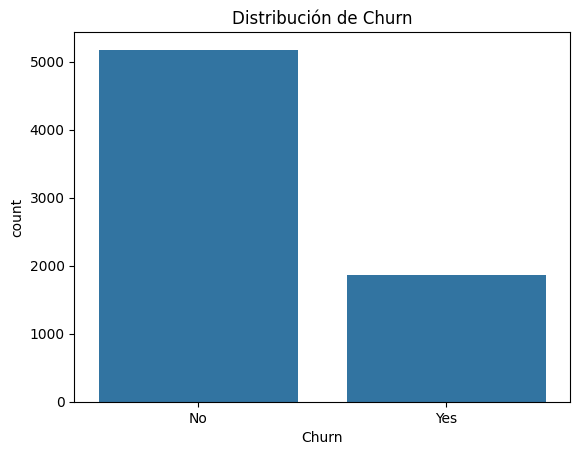

In [13]:
#Graficos
#Distribución de la variable objetivo-Churn
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Churn', data=df)
plt.title('Distribución de Churn')
plt.show()

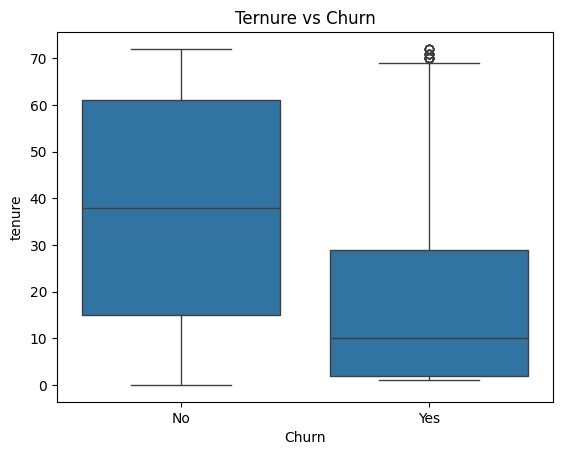

In [14]:
#Relación entre tenure y churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Ternure vs Churn')
plt.show()

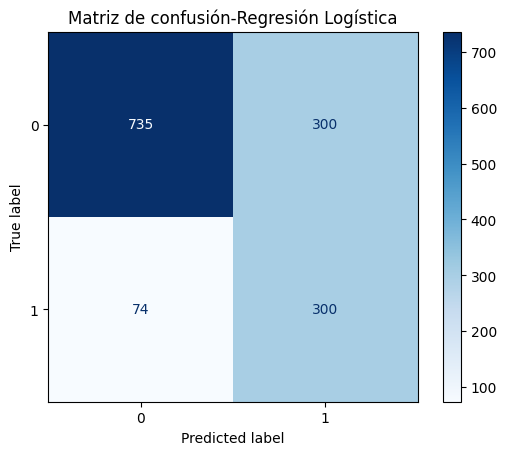

In [15]:
#Matriz de confusión-Modelo
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, x_test, y_test,cmap='Blues')
plt.title('Matriz de confusión-Regresión Logística')
plt.show()


In [16]:
#Extracción de Coeficientes
feature_names = model.named_steps['preprocess'].get_feature_names_out()
coeficientes = model.named_steps['classifier'].coef_[0]

coef_df = pd.DataFrame({'Feature': feature_names, 'Coeficientes': coeficientes}).sort_values(by='Coeficientes', ascending=False)

/tmp/ipython-input-60066508.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficientes', y='Feature', data=coef_df.head(), palette='viridis')


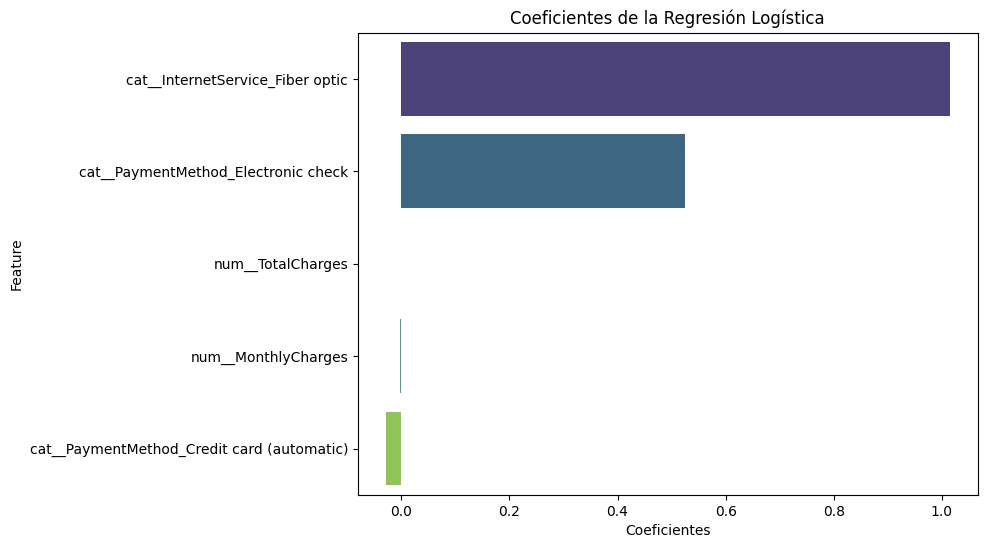

In [17]:
#Gráfico
plt.figure(figsize=(8, 6))
sns.barplot(x='Coeficientes', y='Feature', data=coef_df.head(), palette='viridis')
plt.title('Coeficientes de la Regresión Logística')
plt.show()